# WeatherPy

---

## My Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Importing the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 571


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city

    # Log the URL, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | badger
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | xining
Processing Record 4 of Set 1 | al jawf
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | martignas-sur-jalle
Processing Record 7 of Set 1 | puerto leguizamo
Processing Record 8 of Set 1 | pacific grove
Processing Record 9 of Set 1 | iskateley
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | haparanda
Processing Record 12 of Set 1 | dalbandin
Processing Record 13 of Set 1 | aasiaat
Processing Record 14 of Set 1 | olonkinbyen
Processing Record 15 of Set 1 | page
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | mejit
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | langarud
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Set 1 | margaret river
Process

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
print(city_data_df.count())


City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64


In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,badger,64.8000,-147.5333,8.93,91,100,1.54,US,1724677542
1,waitangi,-43.9535,-176.5597,8.79,97,95,0.89,NZ,1724677544
2,xining,36.6167,101.7667,16.43,85,68,1.35,CN,1724677545
3,al jawf,29.5000,38.7500,39.74,12,2,1.91,SA,1724677546
4,port-aux-francais,-49.3500,70.2167,3.06,83,9,16.61,TF,1724677425


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,badger,64.8000,-147.5333,8.93,91,100,1.54,US,1724677542
1,waitangi,-43.9535,-176.5597,8.79,97,95,0.89,NZ,1724677544
2,xining,36.6167,101.7667,16.43,85,68,1.35,CN,1724677545
3,al jawf,29.5000,38.7500,39.74,12,2,1.91,SA,1724677546
4,port-aux-francais,-49.3500,70.2167,3.06,83,9,16.61,TF,1724677425


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

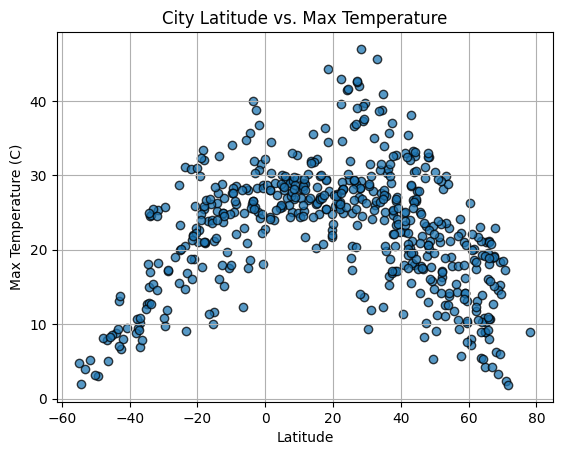

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.75, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity


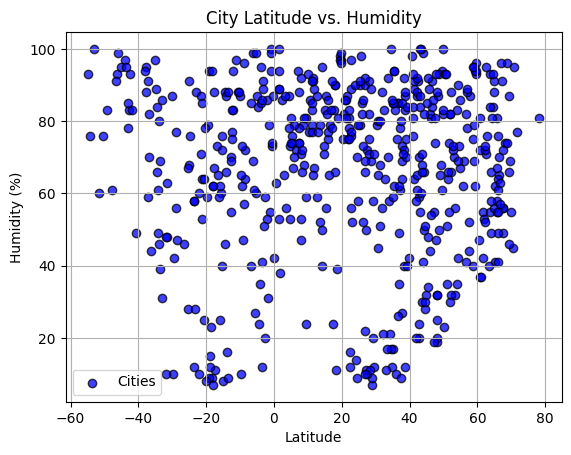

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.75, color="blue", label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.legend()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

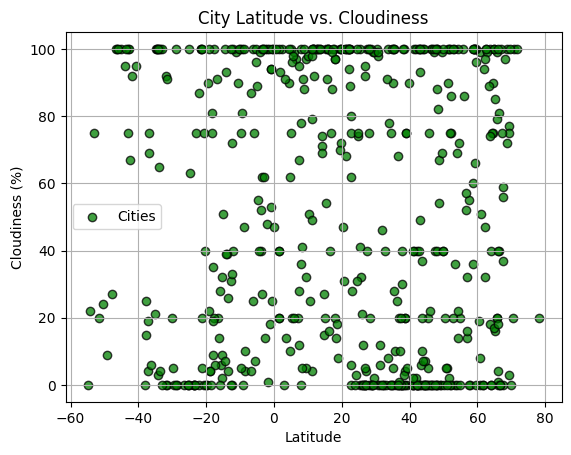

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.75, color="green", label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.legend()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

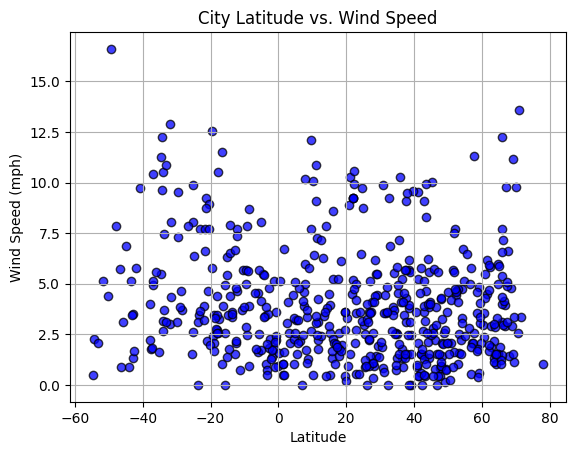

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, alpha=0.75, color="blue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
def plot_linear_regression(x_data, y_data, x_label, y_label, title, filename):
    """
    Perform linear regression on x_data and y_data and plot the results.
    
    Parameters:
    x_data (pd.Series or list): The x-axis data (e.g., latitudes).
    y_data (pd.Series or list): The y-axis data (e.g., temperatures).
    x_label (str): Label for the x-axis.
    y_label (str): Label for the y-axis.
    title (str): Title of the plot.
    filename (str): Path to save the plot.
    """
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    
    # Calculate regression line values
    regression_line = x_data * slope + intercept
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, color='blue', edgecolor='black', alpha=0.7, marker='o')
    plt.plot(x_data, regression_line, color='red', linewidth=2)
    
    # Annotate with equation and R-squared value
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(line_eq, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='red')
    
    # Add labels and title
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(False)
  
    
    # Print R-squared value
    r_squared = r_value**2
    print(f"The r^2-value is: {r_squared:.4f}")
    
    # Save and show the plot
    plt.savefig(filename)
    plt.show()

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,badger,64.8000,-147.5333,8.93,91,100,1.54,US,1724677542
2,xining,36.6167,101.7667,16.43,85,68,1.35,CN,1724677545
3,al jawf,29.5000,38.7500,39.74,12,2,1.91,SA,1724677546
5,martignas-sur-jalle,44.8453,-0.7806,27.87,32,0,4.12,FR,1724677451
7,pacific grove,36.6177,-121.9166,15.30,85,0,1.79,US,1724677552


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,8.79,97,95,0.89,NZ,1724677544
4,port-aux-francais,-49.3500,70.2167,3.06,83,9,16.61,TF,1724677425
6,puerto leguizamo,-0.1934,-74.7819,22.75,87,100,0.95,CO,1724677550
15,puerto natales,-51.7236,-72.4875,5.25,60,20,5.14,CL,1724677458
17,blackmans bay,-43.0167,147.3167,13.18,78,100,1.34,AU,1724677565


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.3712


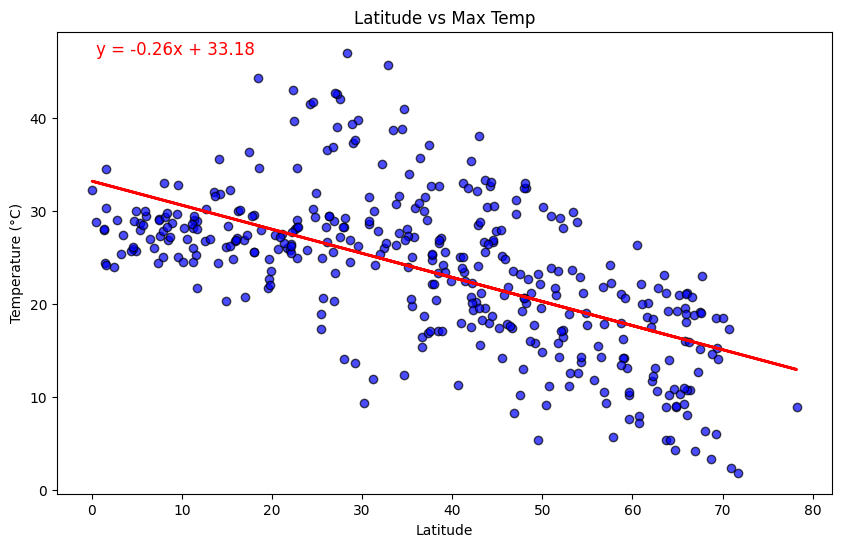

In [25]:
# Call the function to create the plot
plot_linear_regression(
    x_data=northern_hemi_df['Lat'],
    y_data=northern_hemi_df['Max Temp'],
    x_label='Latitude',
    y_label='Temperature (°C)',
    title='Latitude vs Max Temp',
    filename='output_data/Northern_Hemisphere_Temperature_vs_Latitude.png'
)

The r^2-value is: 0.5731


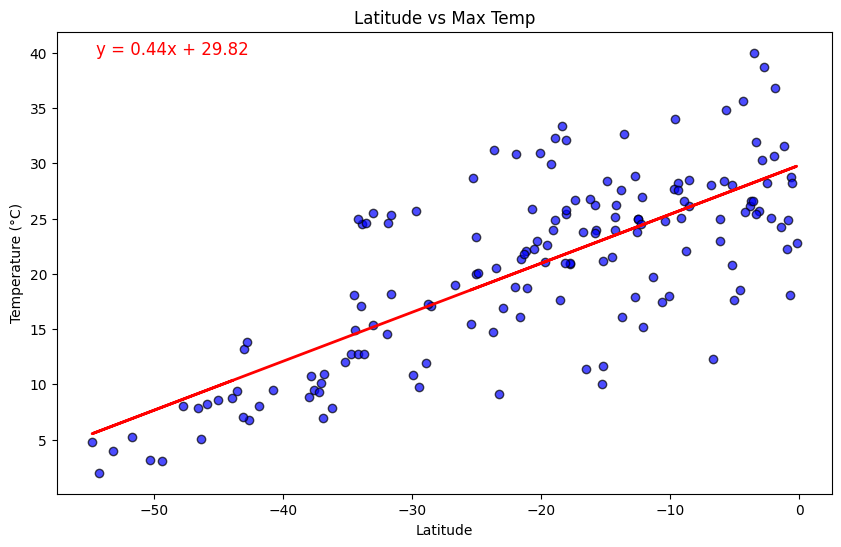

In [28]:
# Call the function to create the plot
plot_linear_regression(
    x_data=southern_hemi_df['Lat'],
    y_data=southern_hemi_df['Max Temp'],
    x_label='Latitude',
    y_label='Temperature (°C)',
    title='Latitude vs Max Temp',
    filename='output_data/Southern_Hemisphere_Temperature_vs_Latitude.png'
)


**Discussion about the linear relationship:

The moderate 𝑅-squared value of 0.3712 for the Northern Hemisphere means that latitude accounts for 37.12% of the temperature variation. This means that temperatures are often higher close to the equator and lower farther away. It also implies that there are other factors besides latitude that account for some of the observed temperature variations.

Similar trends are seen in the Southern Hemisphere, where temperatures tend to drop as latitude rises toward the poles. The R-squared value of 0.5731 indicates the degree to which latitude accurately predicts temperature variations, in this case 57.31%, which points to other factors besides latitude that account for the temperature in this hemisphere.

With confidence, we establish from the two analyses on linear regression that latitude only explains the variability experienced in the temparature of the two hemispheres by a given percentage. It follows therefore that latitude is not the only factor influencing temperature, even though it plays a considerable role.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.005626793572570698


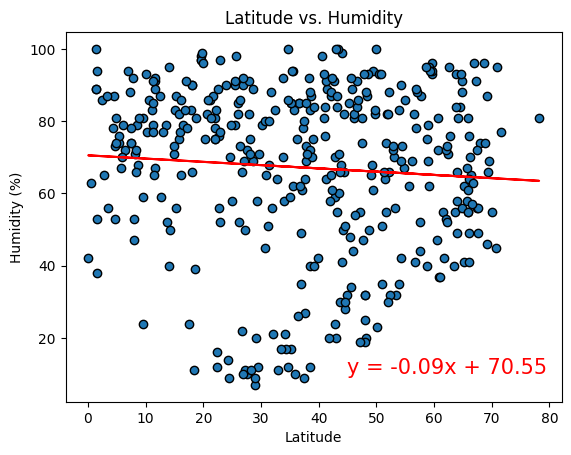

In [29]:
# Northern Hemisphere
# Create a scatter plot of Latitude vs. Humidity for the Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], edgecolor='black')

# Call the linear regression function
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

# Plot the regression line
regress_values = northern_hemi_df['Lat'] * slope + intercept
plt.plot(northern_hemi_df['Lat'], regress_values, "r-")

# Annotate the plot with the line equation and r-squared value
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', (45,10), fontsize=15, color='red')


# Incorporate other graph properties
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(False)

# Print the r-squared value
print(f"The r^2-value is: {r_value**2}")

# Save the figure
plt.savefig("output_data/Fig_Humidity_Latitude_Northern.png")

# Show the plot
plt.show()

The r^2-value is: 0.018136376647857767


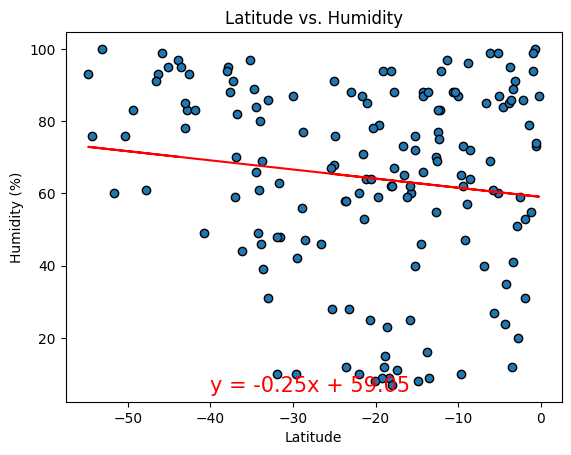

In [30]:
# Create a scatter plot of Latitude vs. Humidity for the Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], edgecolor='black')

# Call the linear regression function
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# Plot the regression line
regress_values = southern_hemi_df['Lat'] * slope + intercept
plt.plot(southern_hemi_df['Lat'], regress_values, "r-")

# Annotate the plot with the line equation and r-squared value
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', (-40,5), fontsize=15, color='red')

# Incorporate other graph properties
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(False)

# Save the figure
plt.savefig("output_data/Fig_Humidity_Latitude_Southern.png")

# Print the r-squared value
print(f"The r^2-value is: {r_value**2}")

# Show the plot
plt.show()

**Discussion about the linear relationship:** 
For the Northern Hemisphere, the linear regression analysis between humidity and latitude shows a weak relationship, as indicated by a low R-squared value (0.005626793572570698). This suggests that latitude alone does not significantly explain the variations in humidity levels in this hemisphere. 

Similarly, in the Southern Hemisphere, the linear regression also reveals a weak correlation. The low R-squared value (0.018136376647857767) further indicates that other environmental factors play a more critical role in determining humidity levels. 

From this, we can posit that while latitude does have some impact on climatic conditions, its influence on humidity is limited.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.013829712061339641


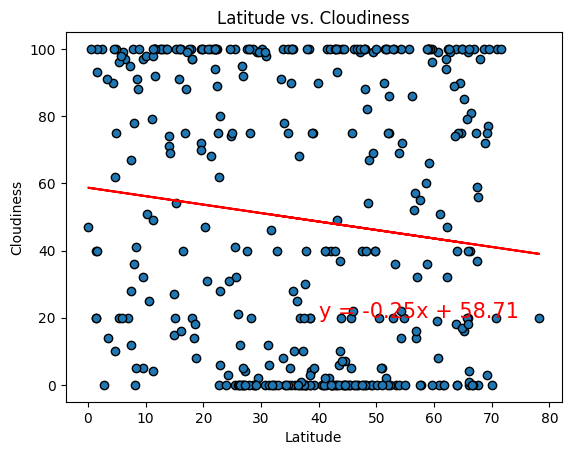

In [37]:
# Create a scatter plot of Latitude vs. Cloudiness for the Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], edgecolor='black')

# Call the linear regression function
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

# Plot the regression line
regress_values = northern_hemi_df['Lat'] * slope + intercept
plt.plot(northern_hemi_df['Lat'], regress_values, "r-")

# Annotate the plot with the line equation and r-squared value
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', (40, 20), fontsize=15, color='red')

# Incorporate other graph properties
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(False)

# Save the figure
plt.savefig("output_data/Fig_Cloudiness_Latitude_Northern.png")

# Print the r-squared value
print(f"The r^2-value is: {r_value**2}")

# Show the plot
plt.show()


The r^2-value is: 0.003061042006108616


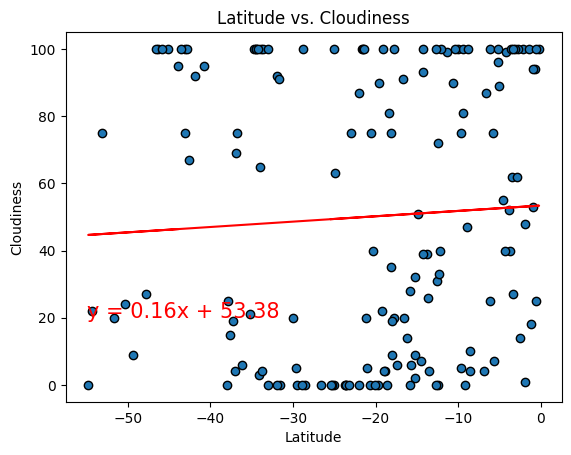

In [35]:
# Create a scatter plot of Latitude vs. Cloudiness for the Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], edgecolor='black')

# Call the linear regression function
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

# Plot the regression line
regress_values = southern_hemi_df['Lat'] * slope + intercept
plt.plot(southern_hemi_df['Lat'], regress_values, "r-")

# Annotate the plot with the line equation and r-squared value
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', (-55, 20), fontsize=15, color='red')

# Incorporate other graph properties
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(False)

# Save the figure
plt.savefig("output_data/Fig_Cloudiness_Latitude_Southern.png")

# Print the r-squared value
print(f"The r^2-value is: {r_value**2}")

# Show the plot
plt.show()


**Discussion about the linear relationship:** 
For the Northern Hemisphere, the linear regression analysis between latitude and cloudiness shows a weak relationship. The 𝑅-squared value is low (0.013829712061339641), indicating that latitude does not significantly explain the variation in cloudiness across the Northern Hemisphere.
This suggests that other factors have a more substantial influence on cloudiness than latitude alone.

In the Southern Hemisphere, a similar weak relationship is observed between latitude and cloudiness. The 
𝑅-squared value (0.003061042006108616) again indicates that latitude is not a strong predictor of 
cloudiness. 

This lack of a strong correlation in both hemispheres highlights that cloudiness is influenced by
other factors that vary regionally, rather than being primarily determined by latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The R^2-value is: 0.00


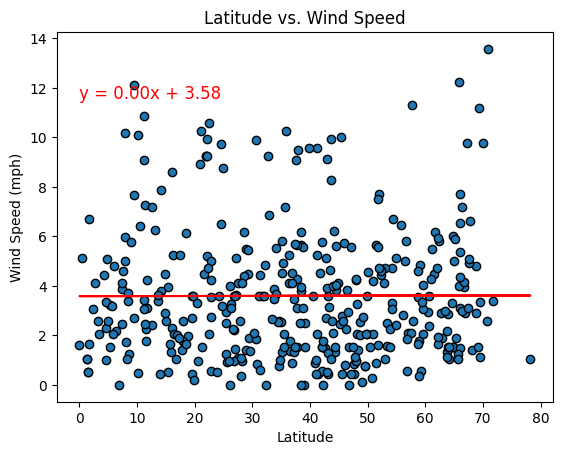

In [44]:
# Create a scatter plot of Latitude vs. Wind Speed for the Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], edgecolor='black')

# Call the linear regression function
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# Plot the regression line
regress_values = northern_hemi_df['Lat'] * slope + intercept
plt.plot(northern_hemi_df['Lat'], regress_values, color="red")  

# Incorporate other graph properties
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(False)

# Annotate the plot with the line equation and r-squared value
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', (0, max(northern_hemi_df['Wind Speed']) - 2),
             fontsize=12, color='red')

# Save the figure
plt.savefig("output_data/Fig_WindSpeed_Latitude_Northern.png")

# Print the r-squared value
print(f"The R^2-value is: {r_value**2:.2f}")

# Show the plot
plt.show()


The R^2-value is: 0.05


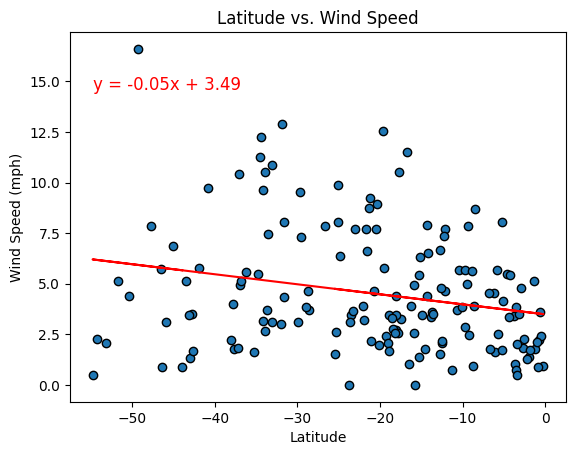

In [45]:
# Create a scatter plot of Latitude vs. Wind Speed for the Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], edgecolor='black')

# Call the linear regression function
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

# Plot the regression line
regress_values = southern_hemi_df['Lat'] * slope + intercept
plt.plot(southern_hemi_df['Lat'], regress_values, color="red")  # Removed "r-" to avoid conflict

# Annotate the plot with the line equation and r-squared value
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', (min(southern_hemi_df['Lat']), max(southern_hemi_df['Wind Speed']) - 2),
             fontsize=12, color='red')

# Incorporate other graph properties
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(False)

# Save the figure
plt.savefig("output_data/Fig_WindSpeed_Latitude_Southern.png")

# Print the r-squared value
print(f"The R^2-value is: {r_value**2:.2f}")

# Show the plot
plt.show()

**Discussion about the linear relationship:**
In the Northern Hemisphere, the linear regression between latitude and wind speed yields an R-squared value of 0.00. This indicates that latitude does not explain any of the variability in wind speed.

In the Southern Hemisphere, the relationship between latitude and wind speed yields an R-squared value of -0.05. This negative value means that relying on latitude alone to predict wind speed will result in wrong and/or poor predictions.

From the two analyses, it is clear that there is not only a lack of predictive power, but also a poor model fit.